In [419]:
pip install ydata-profiling

In [420]:
pip install dython


Note: you may need to restart the kernel to use updated packages.


In [421]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

In [422]:
#Get the data

from urllib.request import urlretrieve

urlretrieve('https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv', 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x11c66f0c110>)

In [423]:
medical = pd.read_csv('medical.csv')

medical

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [424]:
#Examine the dataset's summary statistics to gain insights into the distribution and scale of each feature.

numerical_summary = medical.describe().transpose()

numerical_summary.style.background_gradient(cmap="viridis")

,count,mean,std,min,25%,50%,75%,max
age,1338.000000,39.207025,14.049960,18.000000,27.000000,39.000000,51.000000,64.000000
bmi,1338.000000,30.663397,6.098187,15.960000,26.296250,30.400000,34.693750,53.130000
children,1338.000000,1.094918,1.205493,0.000000,0.000000,1.000000,2.000000,5.000000
charges,1338.000000,13270.422265,12110.011237,1121.873900,4740.287150,9382.033000,16639.912515,63770.428010


In [425]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Generating a Data Profile Report
Using ydata_profiling library to generate a comprehensive data profile report.

In [427]:
#specify categorical and numerical columns

categorical_columns = ['sex', 'smoker', 'region']
numerical_columns = ['age', 'bmi', 'children', 'charges']

#ensure correct data types
medical[categorical_columns] = medical[categorical_columns].astype('category')
medical[numerical_columns] = medical[numerical_columns].astype('float64')

#generate profile
profile = ProfileReport(medical, title="Medical Data Profiling Report", correlations=None, explorative=True)

profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

From the Data Profile Report, we found that there is a duplicate row. But for now we will just keep it as we could not further investigate whether it is a data entry error or just a coincidence.

## Univariate Analysis 

#### Age

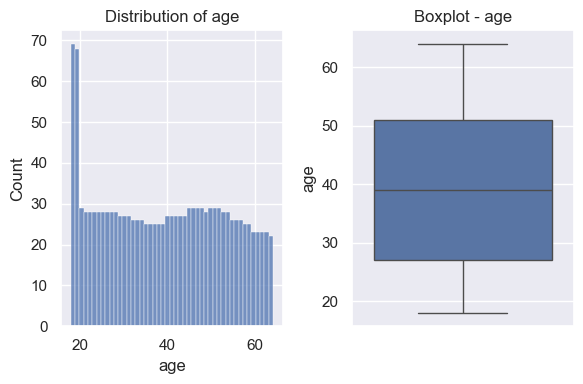

In [431]:
%matplotlib inline

variable = 'age'

plt.figure(figsize = (6, 4))
#histogram
plt.subplot(1, 2, 1)
sns.histplot(x= variable, data=medical, bins=47)
plt.title(f'Distribution of {variable}')

#boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y = variable, data = medical)
plt.title(f'Boxplot - {variable}')

plt.tight_layout() #to avoid labels overlap

#### BMI 

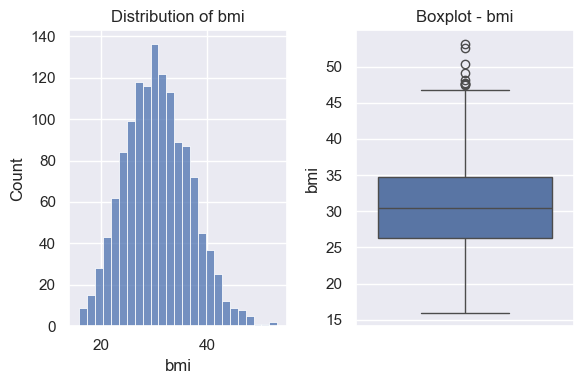

In [433]:
variable = 'bmi'

plt.figure(figsize = (6, 4))
#histogram
plt.subplot(1, 2, 1)
sns.histplot(x= variable, data=medical)
plt.title(f'Distribution of {variable}')

#boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y = variable, data = medical)
plt.title(f'Boxplot - {variable}')

plt.tight_layout() 

#### Children

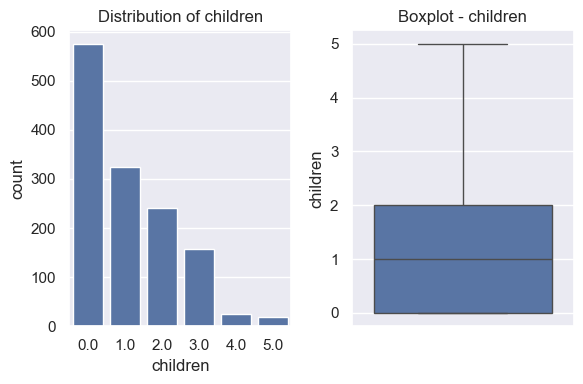

In [435]:
variable = 'children'

plt.figure(figsize = (6, 4))
#histogram
plt.subplot(1, 2, 1)
sns.countplot(x= variable, data=medical)
plt.title(f'Distribution of {variable}')

#boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y = variable, data = medical)
plt.title(f'Boxplot - {variable}')

plt.tight_layout()

#### Charges 

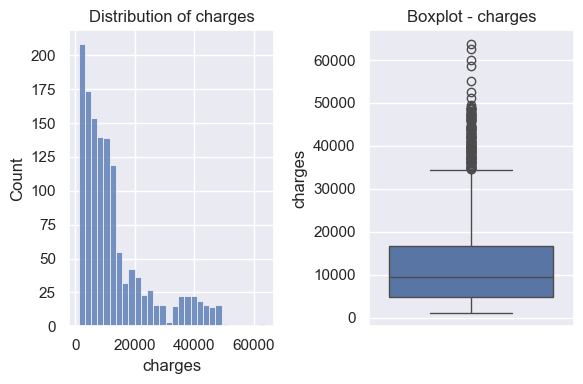

In [437]:
variable = 'charges'

plt.figure(figsize = (6, 4))
#histogram
plt.subplot(1, 2, 1)
sns.histplot(x= variable, data=medical)
plt.title(f'Distribution of {variable}')

#boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y = variable, data = medical)
plt.title(f'Boxplot - {variable}')

plt.tight_layout()

#### Sex

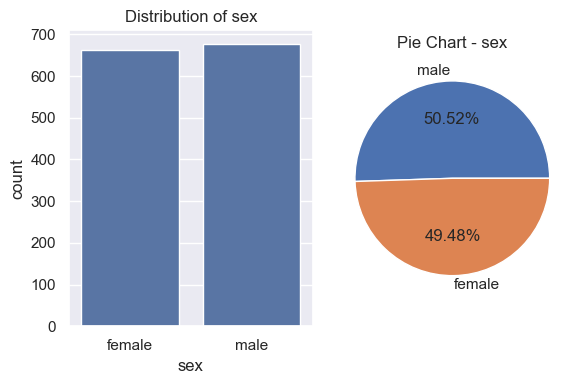

In [439]:
variable = 'sex'

plt.figure(figsize = (6, 4))
#histogram
plt.subplot(1, 2, 1)
sns.countplot(x= variable, data=medical)
plt.title(f'Distribution of {variable}')

#pie chart
plt.subplot(1, 2, 2)
counts = medical[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')

plt.tight_layout()

#### Smoker

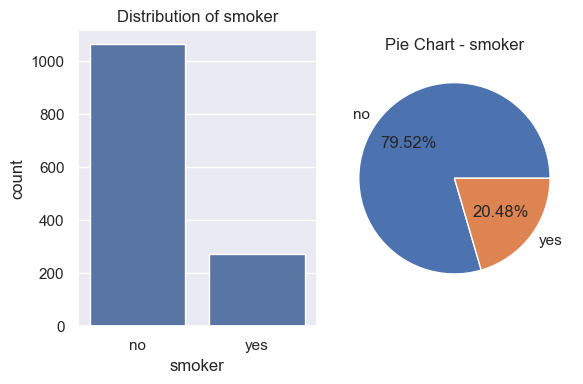

In [441]:
variable = 'smoker'

plt.figure(figsize = (6, 4))
#histogram
plt.subplot(1, 2, 1)
sns.countplot(x= variable, data=medical)
plt.title(f'Distribution of {variable}')

#pie chart
plt.subplot(1, 2, 2)
counts = medical[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')

plt.tight_layout()

#### Region

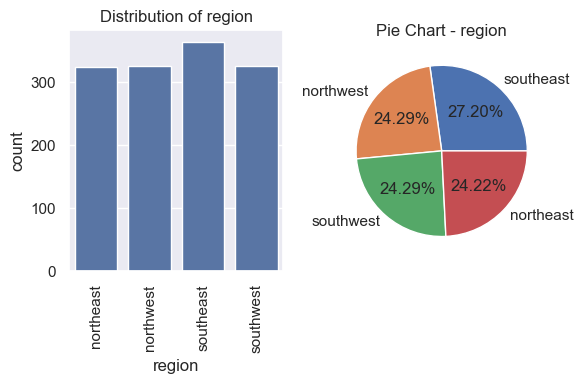

In [443]:
variable = 'region'

plt.figure(figsize = (6, 4))
#histogram
plt.subplot(1, 2, 1)
sns.countplot(x= variable, data=medical)
plt.title(f'Distribution of {variable}')
plt.xticks(rotation = 90)

#pie chart
plt.subplot(1, 2, 2)
counts = medical[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')

plt.tight_layout()

## Multivariate Analysis 

#### Age vs Charges

Text(0.5, 1.0, 'Scatter Plot of age vs charges')

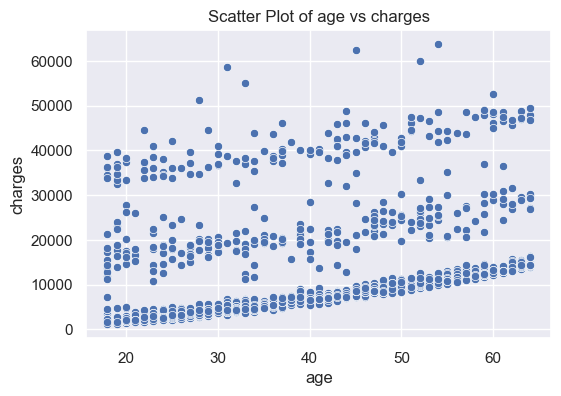

In [446]:
variable1 = 'age'
variable2 = 'charges'

plt.figure(figsize = (6, 4))
sns.set(style='darkgrid')
sns.scatterplot(data=medical, x=variable1, y=variable2)
plt.title(f"Scatter Plot of {variable1} vs {variable2}")

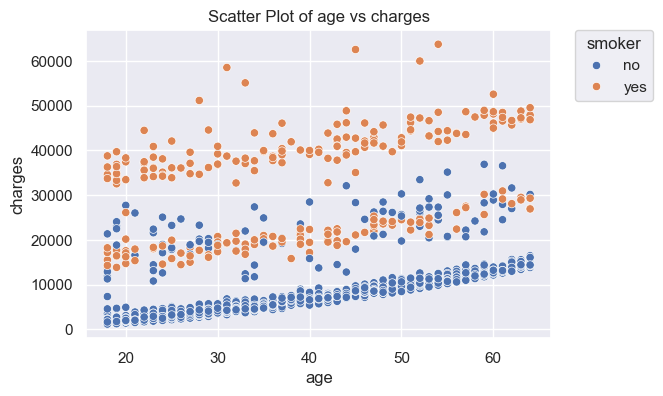

In [447]:
plt.figure(figsize = (6, 4))
sns.set(style='darkgrid')
sns.scatterplot(data=medical, x=variable1, y=variable2, hue='smoker')
plt.title(f"Scatter Plot of {variable1} vs {variable2}")

# Improve legend
plt.legend(title='smoker', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

insights:

#### BMI vs Charges

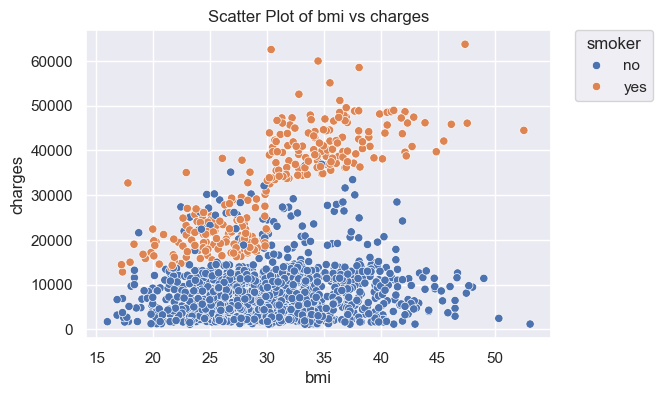

In [450]:
variable1 = 'bmi'
variable2 = 'charges'

plt.figure(figsize = (6, 4))
sns.set(style='darkgrid')
sns.scatterplot(data=medical, x=variable1, y=variable2, hue='smoker')
plt.title(f"Scatter Plot of {variable1} vs {variable2}")

# Improve legend
plt.legend(title='smoker', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

#### Children vs Charges

Text(0.5, 1.0, 'Bar Plot of children vs charges')

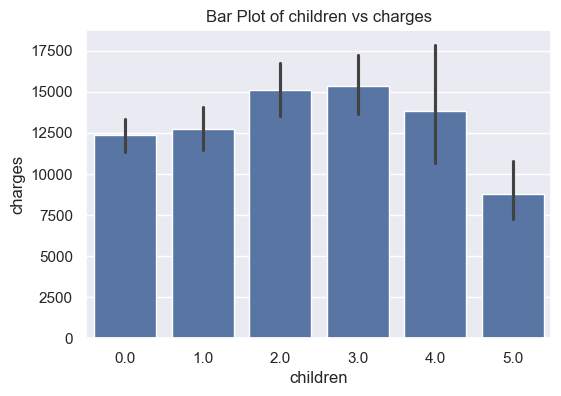

In [452]:
variable1 = 'children'
variable2 = 'charges'

plt.figure(figsize = (6, 4))
#sns.set(style='darkgrid')
sns.barplot(data=medical, x=variable1, y=variable2)
plt.title(f"Bar Plot of {variable1} vs {variable2}")

#### Sex vs Charges

Text(0.5, 1.0, 'Bar Plot of sex vs charges')

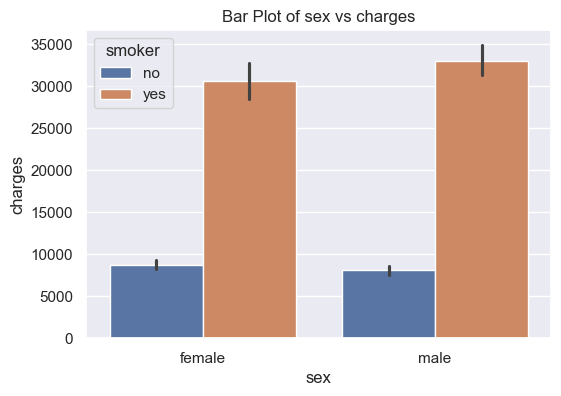

In [454]:
variable1 = 'sex'
variable2 = 'charges'

plt.figure(figsize = (6, 4))
#sns.set(style='darkgrid')
sns.barplot(data=medical, x=variable1, y=variable2, hue="smoker")
plt.title(f"Bar Plot of {variable1} vs {variable2}")

Text(0.5, 1.0, 'Violin Plot of sex vs charges')

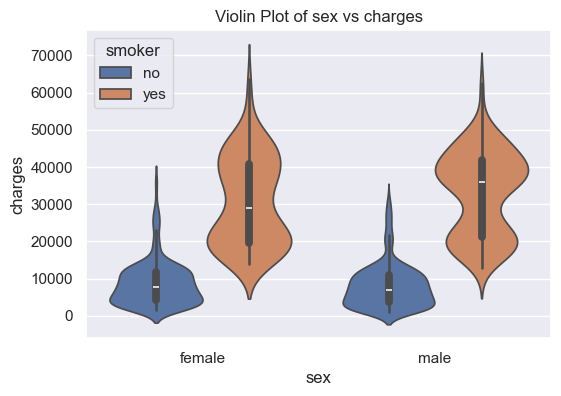

In [455]:
plt.figure(figsize = (6, 4))
sns.violinplot(data=medical, x=variable1, y=variable2, hue="smoker")
plt.title(f"Violin Plot of {variable1} vs {variable2}")

#### Smoker vs Charges

Text(0.5, 1.0, 'Bar Plot of smoker vs charges')

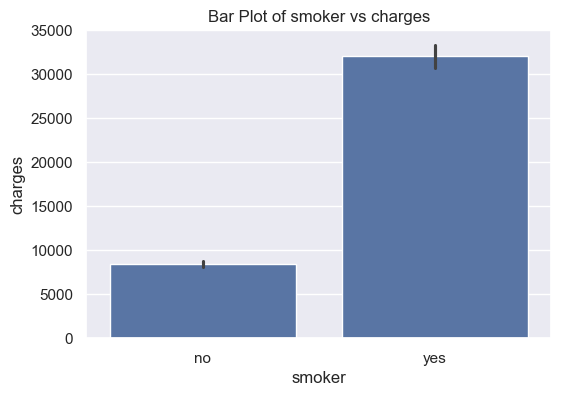

In [457]:
variable1 = 'smoker'
variable2 = 'charges'

plt.figure(figsize = (6, 4))
#sns.set(style='darkgrid')
sns.barplot(data=medical, x=variable1, y=variable2)
plt.title(f"Bar Plot of {variable1} vs {variable2}")

#### Region vs Charges

Text(0.5, 1.0, 'Bar Plot of region vs charges')

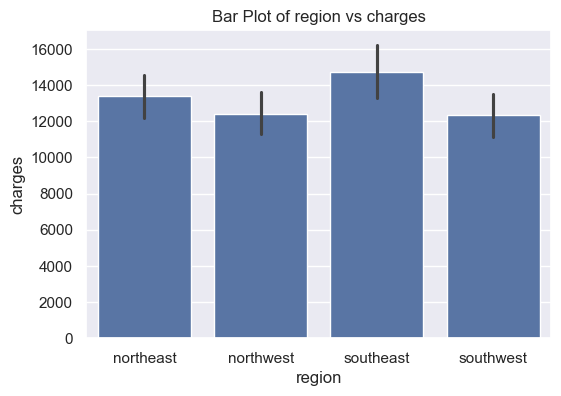

In [459]:
variable1 = 'region'
variable2 = 'charges'

plt.figure(figsize = (6, 4))
#sns.set(style='darkgrid')
sns.barplot(data=medical, x=variable1, y=variable2)
plt.title(f"Bar Plot of {variable1} vs {variable2}")

### Correlation

Text(0.5, 1.0, 'Correlation Matrix')

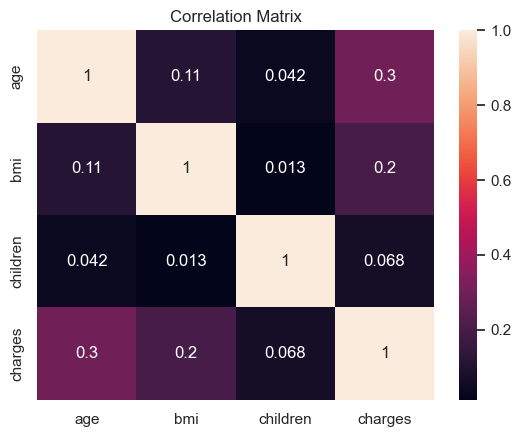

In [461]:
sns.heatmap(medical.corr(numeric_only=True), annot=True)
plt.title("Correlation Matrix")

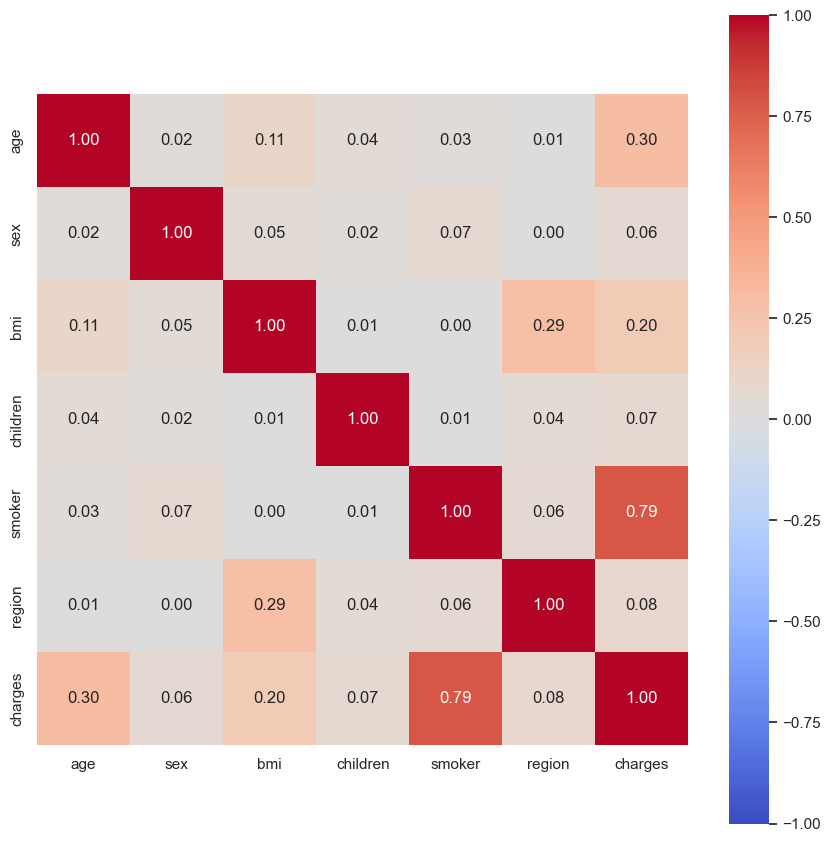

{'corr':                age       sex       bmi  children    smoker    region   charges
 age       1.000000  0.020856  0.109272  0.042469  0.025019  0.013394  0.299008
 sex       0.020856  1.000000  0.046371  0.017163  0.069145  0.000000  0.057292
 bmi       0.109272  0.046371  1.000000  0.012759  0.003750  0.285612  0.198341
 children  0.042469  0.017163  0.012759  1.000000  0.007673  0.040137  0.067998
 smoker    0.025019  0.069145  0.003750  0.007673  1.000000  0.056982  0.787251
 region    0.013394  0.000000  0.285612  0.040137  0.056982  1.000000  0.081449
 charges   0.299008  0.057292  0.198341  0.067998  0.787251  0.081449  1.000000,
 'ax': <Axes: >}

In [462]:
from dython.nominal import associations

associations(medical, cmap = "coolwarm", annot = True)

The correlation matrix revealed that there **high correlation** between 'charges' and 'smoker'.

##  Create a model using Linear Regression 

In [465]:
#create a separate df for smoker and non smoker

smoker_df = medical[medical["smoker"] == 'yes']
print(smoker_df)

non_smoker_df = medical[medical["smoker"] == 'no']
print(non_smoker_df)

       age     sex     bmi  children smoker     region      charges
0     19.0  female  27.900       0.0    yes  southwest  16884.92400
11    62.0  female  26.290       0.0    yes  southeast  27808.72510
14    27.0    male  42.130       0.0    yes  southeast  39611.75770
19    30.0    male  35.300       0.0    yes  southwest  36837.46700
23    34.0  female  31.920       1.0    yes  northeast  37701.87680
...    ...     ...     ...       ...    ...        ...          ...
1313  19.0  female  34.700       2.0    yes  southwest  36397.57600
1314  30.0  female  23.655       3.0    yes  northwest  18765.87545
1321  62.0    male  26.695       0.0    yes  northeast  28101.33305
1323  42.0  female  40.370       2.0    yes  southeast  43896.37630
1337  61.0  female  29.070       0.0    yes  northwest  29141.36030

[274 rows x 7 columns]
       age     sex     bmi  children smoker     region      charges
1     18.0    male  33.770       1.0     no  southeast   1725.55230
2     28.0    male  33.0

In [466]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [467]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [468]:
#convert categorical column into numerical
LabEnc = LabelEncoder()
LabEnc.fit(medical.sex.drop_duplicates())
medical.sex = LabEnc.transform(medical.sex)
LabEnc.fit(medical.smoker.drop_duplicates())
medical.smoker = LabEnc.transform(medical.smoker)
LabEnc.fit(medical.region.drop_duplicates())
medical.region = LabEnc.transform(medical.region)

print(medical.dtypes)
print(medical)

age         float64
sex           int32
bmi         float64
children    float64
smoker        int32
region        int32
charges     float64
dtype: object
       age  sex     bmi  children  smoker  region      charges
0     19.0    0  27.900       0.0       1       3  16884.92400
1     18.0    1  33.770       1.0       0       2   1725.55230
2     28.0    1  33.000       3.0       0       2   4449.46200
3     33.0    1  22.705       0.0       0       1  21984.47061
4     32.0    1  28.880       0.0       0       1   3866.85520
...    ...  ...     ...       ...     ...     ...          ...
1333  50.0    1  30.970       3.0       0       1  10600.54830
1334  18.0    0  31.920       0.0       0       0   2205.98080
1335  18.0    0  36.850       0.0       0       2   1629.83350
1336  21.0    0  25.800       0.0       0       3   2007.94500
1337  61.0    0  29.070       0.0       1       1  29141.36030

[1338 rows x 7 columns]


In [469]:
# define input (x) and targets (y)
x = medical.drop(["charges"], axis = 1)
y = medical["charges"]

#split training (80%) and test data (20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

print(x_train.shape)
print(y_train.shape)


(1070, 6)
(1070,)


In [470]:
# Create and train model
LinReg = LinearRegression()
model = LinReg.fit(x_train, y_train)

print(f"Intercept: {LinReg.intercept_}")
print(f"Coefficients: {LinReg.coef_}")
print(f"The R-squared value: {LinReg.score(x_test, y_test)}")

Intercept: -11661.983908824413
Coefficients: [  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]
The R-squared value: 0.7998747145449959


The R-squared results we get is pretty closed to 1 which makes our model is quite good!